In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("table2.csv")

In [2]:
df.head()

,Unnamed: 0,Year,Team,Age,GP,W,L,W/L%,Avg Exp,Coach Exp,Coach W/L%,Avg PER,Avg WS,Last Year W/L%
0,12,2013,Atlanta Hawks,27.1,82.0,44,38.0,0.537,5.333,2,0.572,13.123,2.564,0.606
1,16,2014,Atlanta Hawks,27.5,82.0,38,44.0,0.463,3.778,0,0.000,13.897,2.870,0.537
2,3,2015,Atlanta Hawks,27.8,82.0,60,22.0,0.732,4.750,1,0.463,13.019,2.656,0.463
3,6,2016,Atlanta Hawks,28.2,82.0,48,34.0,0.585,5.294,2,0.598,13.983,3.069,0.732
4,18,2017,Atlanta Hawks,27.9,82.0,43,39.0,0.524,5.900,3,0.593,13.690,3.053,0.585


In [3]:
#Only predicting wins for seasons where 82 games were played
df = df[df['GP'] == 82]

In [4]:
#Scatter plots for observing relationship between each feature and Wins feature

<AxesSubplot:xlabel='Age', ylabel='W'>

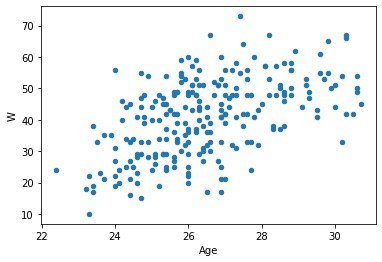

In [5]:
df.plot.scatter(x="Age", y="W")

<AxesSubplot:xlabel='Avg Exp', ylabel='W'>

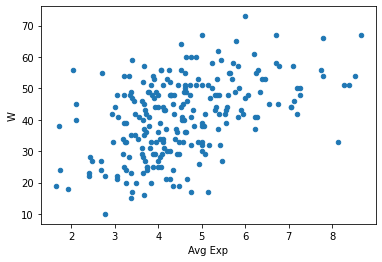

In [6]:
df.plot.scatter(x="Avg Exp", y="W")

<AxesSubplot:xlabel='Coach Exp', ylabel='W'>

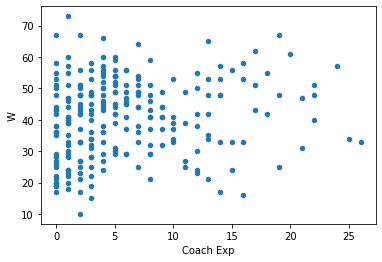

In [7]:
df.plot.scatter(x="Coach Exp", y="W")

<AxesSubplot:xlabel='Coach W/L%', ylabel='W'>

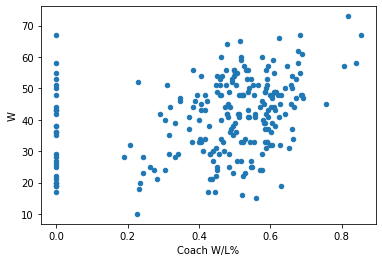

In [8]:
df.plot.scatter(x="Coach W/L%", y="W")

<AxesSubplot:xlabel='Avg PER', ylabel='W'>

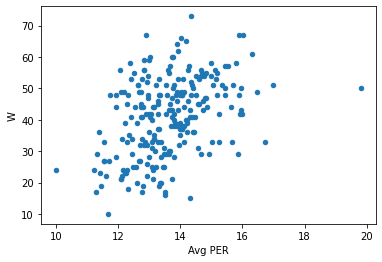

In [9]:
df.plot.scatter(x="Avg PER", y="W")

<AxesSubplot:xlabel='Avg WS', ylabel='W'>

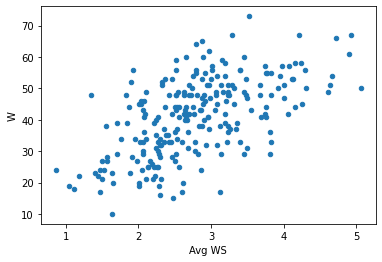

In [10]:
df.plot.scatter(x="Avg WS", y="W")

<AxesSubplot:xlabel='Last Year W/L%', ylabel='W'>

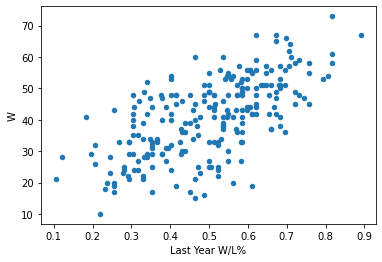

In [11]:
df.plot.scatter(x="Last Year W/L%", y="W")

In [12]:
#Observe the correlation between each feature and Wins feature
correlation = df.corr()["W"]
print(correlation)

Unnamed: 0       -0.953796
Year              0.004260
Age               0.531270
GP                     NaN
W                 1.000000
L                -1.000000
W/L%              0.999998
Avg Exp           0.466568
Coach Exp         0.134995
Coach W/L%        0.337951
Avg PER           0.407446
Avg WS            0.588295
Last Year W/L%    0.642330
Name: W, dtype: float64


In [13]:
#Viewing distribution of each feature to determine if any are not normally distributed

array([[<AxesSubplot:title={'center':'W'}>]], dtype=object)

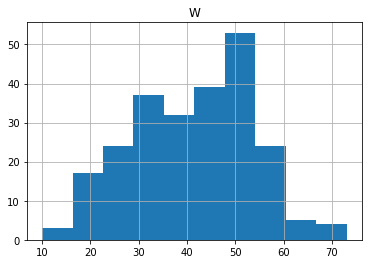

In [14]:
df.hist(column='W')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

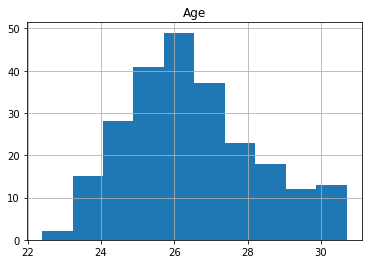

In [15]:
df.hist(column='Age')

array([[<AxesSubplot:title={'center':'Avg Exp'}>]], dtype=object)

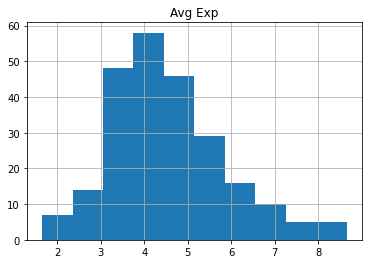

In [16]:
df.hist(column='Avg Exp')

array([[<AxesSubplot:title={'center':'Coach Exp'}>]], dtype=object)

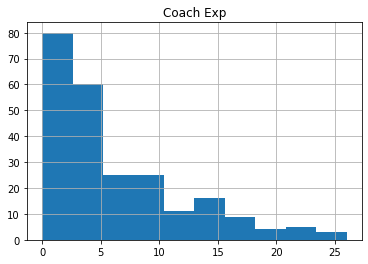

In [17]:
df.hist(column='Coach Exp')

array([[<AxesSubplot:title={'center':'Coach W/L%'}>]], dtype=object)

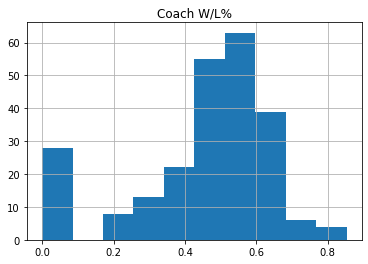

In [18]:
df.hist(column='Coach W/L%')

array([[<AxesSubplot:title={'center':'Avg PER'}>]], dtype=object)

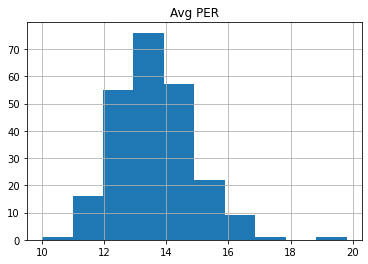

In [19]:
df.hist(column='Avg PER')

array([[<AxesSubplot:title={'center':'Avg WS'}>]], dtype=object)

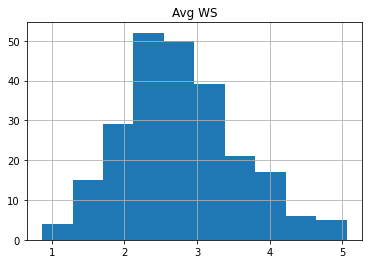

In [20]:
df.hist(column='Avg WS')

array([[<AxesSubplot:title={'center':'Last Year W/L%'}>]], dtype=object)

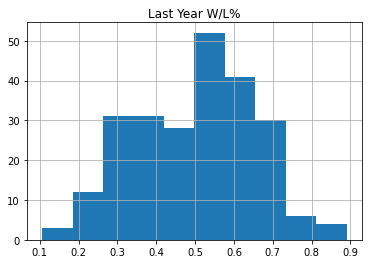

In [21]:
df.hist(column='Last Year W/L%')

In [22]:
#Linear Regression Model

In [23]:
#Splitting data into training and testing
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [24]:
#Fitting the model
model = LinearRegression()
model.fit(
    X=train[["Age", "Avg Exp", "Avg WS", "Avg PER", "Last Year W/L%"]],
    y=train["W"]
)

LinearRegression()

In [25]:
#Predicting wins on test data
predicted = model.predict(
    X=test[["Age", "Avg Exp", "Avg WS", "Avg PER", "Last Year W/L%"]]
)

In [26]:
expected = test["W"]

In [27]:
#Determining MSE and RMSE for model predictions
lr_mse = mean_squared_error(expected, predicted)
print(lr_mse)
lr_rmse = mean_squared_error(expected, predicted, squared = False)
print(lr_rmse)

64.78596259591441
8.048972766503462


In [28]:
#Observing 2022 season predicted standings for Linear Regression model

In [29]:
df2 = df[df["Year"] == 2022]

In [30]:
df2["Predicted W"] = (model.predict(
    X=df2[["Age", "Avg Exp", "Avg WS", "Avg PER", "Last Year W/L%"]]
))

/var/folders/mh/bzcftdl55cj6hrvx6vqfym1m0000gq/T/ipykernel_70699/3672978941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Predicted W"] = (model.predict(


In [31]:
df2 = df2.sort_values(by=['Predicted W'], ascending = False)

In [32]:
print(df2[["Team", "W", "Predicted W"]])

                       Team   W  Predicted W
29            Brooklyn Nets  44    54.273754
229      Philadelphia 76ers  51    52.171868
289               Utah Jazz  49    50.645783
239            Phoenix Suns  64    49.626230
139      Los Angeles Lakers  33    49.365713
169         Milwaukee Bucks  51    48.499308
79           Denver Nuggets  48    46.173934
129    Los Angeles Clippers  42    45.809307
99    Golden State Warriors  53    43.939823
9             Atlanta Hawks  43    42.575786
159              Miami Heat  53    42.514572
69         Dallas Mavericks  52    42.038582
199         New York Knicks  37    41.212905
249  Portland Trail Blazers  27    39.260847
299      Washington Wizards  35    39.081233
39        Charlotte Bobcats  43    38.942565
119          Indiana Pacers  25    38.486909
149       Memphis Grizzlies  56    37.910411
19           Boston Celtics  51    37.650015
49            Chicago Bulls  46    36.238936
259        Sacramento Kings  30    34.805319
189    New

In [33]:
#KNN Regression Model

In [34]:
#Initializing model
x_data = df[["Avg WS", "Last Year W/L%"]]
y_data = df["W"]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [35]:
#Determining MSE and RMSE for model predictions
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
print(mse)
rmse = mean_squared_error(y_train, train_preds,squared = False)
print(rmse)

40.992105263157896
6.402507732377829


In [36]:
#Observing 2022 season predicted standings for KNN Regression model

In [37]:
df3 = df[df["Year"] == 2022]
df3["Predicted W"] = (knn_model.predict(df3[["Avg WS", "Last Year W/L%"]]
))
df3 = df3.sort_values(by=['Predicted W'], ascending = False)

/var/folders/mh/bzcftdl55cj6hrvx6vqfym1m0000gq/T/ipykernel_70699/1363367065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Predicted W"] = (knn_model.predict(df3[["Avg WS", "Last Year W/L%"]]


In [38]:
print(df3[["Team", "W", "Predicted W"]])

                       Team   W  Predicted W
239            Phoenix Suns  64         64.5
99    Golden State Warriors  53         55.0
169         Milwaukee Bucks  51         53.0
39        Charlotte Bobcats  43         51.5
29            Brooklyn Nets  44         48.5
79           Denver Nuggets  48         48.5
229      Philadelphia 76ers  51         48.0
129    Los Angeles Clippers  42         46.5
279         Toronto Raptors  48         46.0
289               Utah Jazz  49         45.5
199         New York Knicks  37         45.0
69         Dallas Mavericks  52         44.5
179  Minnesota Timberwolves  46         44.0
159              Miami Heat  53         43.0
299      Washington Wizards  35         38.5
49            Chicago Bulls  46         37.5
149       Memphis Grizzlies  56         36.0
249  Portland Trail Blazers  27         36.0
89          Detroit Pistons  23         35.5
269       San Antonio Spurs  34         35.5
9             Atlanta Hawks  43         35.0
139      L